In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd 
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
from PIL import Image
from sklearn.utils import resample
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from transformers import RobertaTokenizer
from transformers import TFRobertaModel
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.layers import Flatten
from sklearn.metrics import precision_recall_curve

import tensorflow as tf
from sklearn.metrics import roc_auc_score, roc_curve,auc
from keras import regularizers
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix,f1_score,classification_report
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.metrics import average_precision_score
from itertools import cycle

lemma = WordNetLemmatizer()
stopword = set(STOPWORDS)
nltk.download('omw-1.4')
%matplotlib inline
import nltk
nltk.download('stopwords')
import nltk
nltk.download('wordnet')


from nltk.corpus import brown
nltk.download("brown")
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


In [ ]:
# Importing the libraries needed
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import torch
import seaborn as sns
import transformers
import json
from tqdm import tqdm
from torch.utils.data import Dataset, DataLoader
from transformers import RobertaModel, RobertaTokenizer
import logging
logging.basicConfig(level=logging.ERROR)

In [ ]:
!pip3 install datasets


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd

import datasets 
dataset = datasets.load_dataset('ucberkeley-dlab/measuring-hate-speech', 'binary')   
df = dataset['train'].to_pandas()
df.describe()


  0%|          | 0/1 [00:00<?, ?it/s]

,comment_id,annotator_id,platform,sentiment,respect,insult,humiliate,status,dehumanize,violence,...,hatespeech,hate_speech_score,infitms,outfitms,annotator_severity,std_err,annotator_infitms,annotator_outfitms,hypothesis,annotator_age
count,135556.000000,135556.000000,135556.000000,135556.000000,135556.000000,135556.00000,135556.000000,135556.000000,135556.000000,135556.000000,...,135556.000000,135556.000000,135556.000000,135556.000000,135556.000000,135556.000000,135556.000000,135556.000000,135556.000000,135451.000000
mean,23530.416138,5567.097812,1.281352,2.954307,2.828875,2.56331,2.278638,2.698575,1.846211,1.052045,...,0.744733,-0.567428,1.034322,1.001052,-0.018817,0.300588,1.007158,1.011841,0.014589,37.910772
std,12387.194125,3230.508937,1.023542,1.231552,1.309548,1.38983,1.370876,0.898500,1.402372,1.345706,...,0.932260,2.380003,0.496867,0.791943,0.487261,0.236380,0.269876,0.675863,0.613006,11.641276
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-8.340000,0.100000,0.070000,-1.820000,0.020000,0.390000,0.280000,-1.578693,18.000000
25%,18148.000000,2719.000000,0.000000,2.000000,2.000000,2.00000,1.000000,2.000000,1.000000,0.000000,...,0.000000,-2.330000,0.710000,0.560000,-0.380000,0.030000,0.810000,0.670000,-0.341008,29.000000
50%,20052.000000,5602.500000,1.000000,3.000000,3.000000,3.00000,3.000000,3.000000,2.000000,0.000000,...,0.000000,-0.340000,0.960000,0.830000,-0.020000,0.340000,0.970000,0.850000,0.110405,35.000000
75%,32038.250000,8363.000000,2.000000,4.000000,4.000000,4.00000,3.000000,3.000000,3.000000,2.000000,...,2.000000,1.410000,1.300000,1.220000,0.350000,0.420000,1.170000,1.130000,0.449555,45.000000
max,50070.000000,11142.000000,3.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,...,2.000000,6.300000,5.900000,9.000000,1.360000,1.900000,2.010000,9.000000,0.987511,81.000000


In [ ]:
df

,comment_id,annotator_id,platform,sentiment,respect,insult,humiliate,status,dehumanize,violence,...,annotator_religion_hindu,annotator_religion_jewish,annotator_religion_mormon,annotator_religion_muslim,annotator_religion_nothing,annotator_religion_other,annotator_sexuality_bisexual,annotator_sexuality_gay,annotator_sexuality_straight,annotator_sexuality_other
0,47777,10873,3,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
1,39773,2790,2,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
2,47101,3379,3,4.0,4.0,4.0,4.0,4.0,4.0,0.0,...,False,False,False,False,True,False,False,False,True,False
3,43625,7365,3,2.0,3.0,2.0,1.0,2.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
4,12538,488,0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135551,37080,8590,2,1.0,1.0,0.0,0.0,2.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
135552,22986,8303,2,2.0,0.0,0.0,0.0,2.0,0.0,0.0,...,False,False,False,False,False,True,True,False,False,False
135553,21008,6207,2,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
135554,22986,7886,2,2.0,0.0,0.0,0.0,2.0,0.0,0.0,...,False,False,False,False,True,False,False,False,True,False


In [ ]:
text = df.text
labels = df.hate_speech_score

In [ ]:

ps = PorterStemmer()
df['text'] = df['text'].apply(lambda x: ' '.join([ps.stem(word) for word in x.split()]))
wnl = WordNetLemmatizer()
df['text'] = df['text'].apply(lambda x: ' '.join([wnl.lemmatize(word) for word in x.split()]))


In [ ]:
df.hate_speech_score = (round(df.hate_speech_score))
df['hate_speech_score'] = df['hate_speech_score'].apply(lambda x: 1 if x > 0 else 0)
df

,comment_id,annotator_id,platform,sentiment,respect,insult,humiliate,status,dehumanize,violence,...,annotator_religion_hindu,annotator_religion_jewish,annotator_religion_mormon,annotator_religion_muslim,annotator_religion_nothing,annotator_religion_other,annotator_sexuality_bisexual,annotator_sexuality_gay,annotator_sexuality_straight,annotator_sexuality_other
0,47777,10873,3,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
1,39773,2790,2,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
2,47101,3379,3,4.0,4.0,4.0,4.0,4.0,4.0,0.0,...,False,False,False,False,True,False,False,False,True,False
3,43625,7365,3,2.0,3.0,2.0,1.0,2.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
4,12538,488,0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135551,37080,8590,2,1.0,1.0,0.0,0.0,2.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
135552,22986,8303,2,2.0,0.0,0.0,0.0,2.0,0.0,0.0,...,False,False,False,False,False,True,True,False,False,False
135553,21008,6207,2,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
135554,22986,7886,2,2.0,0.0,0.0,0.0,2.0,0.0,0.0,...,False,False,False,False,True,False,False,False,True,False


In [ ]:
label_encoder = LabelEncoder()
labels = df.hate_speech_score

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
df['text'] = df['text'].apply(lambda x: re.sub('[^a-zA-z0-9\s]','',x))
df['text'] = df['text'].apply(lambda x: x.lower())
df['text'] = df['text'].apply(lambda x: re.sub('\s+',' ',x))

# Stop words removal
stop_words = set(stopwords.words('english'))
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Stemming and Lemmatization
ps = PorterStemmer()
df['text'] = df['text'].apply(lambda x: ' '.join([ps.stem(word) for word in x.split()]))
wnl = WordNetLemmatizer()
df['text'] = df['text'].apply(lambda x: ' '.join([wnl.lemmatize(word) for word in x.split()]))

# Encoding labels
label_encoder = LabelEncoder()
df['hate_speech_score'] = label_encoder.fit_transform(df['hate_speech_score'])

# Handling imbalanced classes
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(df[['text']], df['hate_speech_score'])
df_resampled = pd.DataFrame(X_resampled, columns=['text'])
df_resampled['hate_speech_score'] = y_resampled

# Word Embedding (example using Word2Vec)
from gensim.models import Word2Vec

corpus = [text.split() for text in df_resampled['text']]
model = Word2Vec(
    text,
    vector_size=100, # Dimensionality of the word vectors
    window=5,
    min_count=1,
    workers=4
)

In [ ]:
data = df
data

,comment_id,annotator_id,platform,sentiment,respect,insult,humiliate,status,dehumanize,violence,...,annotator_religion_hindu,annotator_religion_jewish,annotator_religion_mormon,annotator_religion_muslim,annotator_religion_nothing,annotator_religion_other,annotator_sexuality_bisexual,annotator_sexuality_gay,annotator_sexuality_straight,annotator_sexuality_other
0,47777,10873,3,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
1,39773,2790,2,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
2,47101,3379,3,4.0,4.0,4.0,4.0,4.0,4.0,0.0,...,False,False,False,False,True,False,False,False,True,False
3,43625,7365,3,2.0,3.0,2.0,1.0,2.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
4,12538,488,0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135551,37080,8590,2,1.0,1.0,0.0,0.0,2.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
135552,22986,8303,2,2.0,0.0,0.0,0.0,2.0,0.0,0.0,...,False,False,False,False,False,True,True,False,False,False
135553,21008,6207,2,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
135554,22986,7886,2,2.0,0.0,0.0,0.0,2.0,0.0,0.0,...,False,False,False,False,True,False,False,False,True,False


In [ ]:
data = data.loc[:, ['text', 'hate_speech_score']]
data

,text,hate_speech_score
0,ye ind sort remind elder ladi play part movi t...,0
1,tran woman read tweet right beauti,0
2,question 4 broad critic america countri flee g...,0
3,time illeg go back countri origin keep freeway...,0
4,starter bend one pink kick pussi get tast beg ...,1
...,...,...
135551,___ __ breaking_new sayi abdulmalikth saudi re...,0
135552,million yemeni particip mass ralli 13squar var...,0
135553,abeshinzo realdonaldtrump shinzoab dictat goe ...,0
135554,million yemeni particip mass ralli 13squar var...,0


In [ ]:
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import accuracy_score
import torch

In [ ]:


max_len=128
text_data=data["text"]
label_data=data["hate_speech_score"]



In [ ]:
roberta_tokenizer = RobertaTokenizer.from_pretrained("roberta-base")

In [ ]:
roberta_model = TFRobertaModel.from_pretrained("roberta-base")

Some layers from the model checkpoint at roberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


In [ ]:
encode_data=roberta_tokenizer.encode_plus(text_data[1000],add_special_tokens = True,max_length =40,pad_to_max_length = True,truncation=True)

In [ ]:
test_input_id=np.asarray(encode_data['input_ids'])
test_attention_mask=np.asarray(encode_data['attention_mask'])
output_data=roberta_model([test_input_id.reshape(1,-1),test_attention_mask.reshape(1,-1)])
type(output_data)

transformers.modeling_tf_outputs.TFBaseModelOutputWithPoolingAndCrossAttentions

In [ ]:
roberta_tokenizer.decode(encode_data["input_ids"])

'<s>yall even breath enough anoth vikvaughni visual wtffffinna blow yall nigger away</s><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>'

In [ ]:
data

,text,hate_speech_score
0,ye ind sort remind elder ladi play part movi t...,0
1,tran woman read tweet right beauti,0
2,question 4 broad critic america countri flee g...,0
3,time illeg go back countri origin keep freeway...,0
4,starter bend one pink kick pussi get tast beg ...,1
...,...,...
135551,___ __ breaking_new sayi abdulmalikth saudi re...,0
135552,million yemeni particip mass ralli 13squar var...,0
135553,abeshinzo realdonaldtrump shinzoab dictat goe ...,0
135554,million yemeni particip mass ralli 13squar var...,0


In [ ]:


final_text_data=data["text"]
final_label_data=np.array(label_data)



In [ ]:
def roberta_encode(final_text_data,max_len):
    input_ids=[]
    attention_masks=[]
    
    for i in range(len(final_text_data)):
        encode_data=roberta_tokenizer.encode_plus(final_text_data[i],add_special_tokens=True,max_length=max_len,pad_to_max_length=True,return_attention_mask=True)
        input_ids.append(encode_data['input_ids'])
        attention_masks.append(encode_data["attention_mask"])
    return np.array(input_ids),np.array(attention_masks)

In [ ]:

text_input_ids,text_attention_masks = roberta_encode(final_text_data,max_len)



Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


In [ ]:
print('Text Input Ids Shape {} \nText Input Attention Mask Shape {} \nLabel Data shape {}'.format(text_input_ids.shape,text_attention_masks.shape,final_label_data.shape))

Text Input Ids Shape (135556, 128) 
Text Input Attention Mask Shape (135556, 128) 
Label Data shape (135556,)


In [ ]:
X_train_input,X_test_input,Y_train_label,Y_test_label,train_mask,test_mask=train_test_split(text_input_ids,final_label_data,text_attention_masks,test_size=0.30,random_state=42,shuffle=True)

In [ ]:


print('Train input shape {}\nTest input shape {}\nTrain label shape {}\nTest label shape {}\nTrain attention mask shape {}\nTest attention mask shape {}'.format(X_train_input.shape,X_test_input.shape,Y_train_label.shape,Y_test_label.shape,train_mask.shape,test_mask.shape))



Train input shape (33889, 128)
Test input shape (101667, 128)
Train label shape (33889,)
Test label shape (101667,)
Train attention mask shape (33889, 128)
Test attention mask shape (101667, 128)


In [ ]:


def Create_Roberta_Model():
    input_ids=tf.keras.Input(shape=(max_len,),dtype="int32")
    attention_masks=tf.keras.Input(shape=(max_len,),dtype="int32")
    
    roberta_model = TFRobertaModel.from_pretrained("roberta-base")
    output_dim = roberta_model(input_ids=input_ids, attention_mask=attention_masks)[0][:,0,:]
    
    dense_layer = tf.keras.layers.Dense(128, activation="relu")(output_dim)
    dropout = tf.keras.layers.Dropout(0.5)(dense_layer)
    final_layer = tf.keras.layers.Dense(2, activation='softmax')(dropout)

    model = tf.keras.models.Model(inputs=[input_ids, attention_masks], outputs=final_layer)
    
    return model



In [ ]:


from sklearn.metrics import Precision, Recall, F1Score

model = Create_Roberta_Model()

loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
optimizer = tf.keras.optimizers.Adam(lr=1e-5)

precision = Precision()
recall = Recall()
f1score = F1Score(num_classes=num_classes, average='macro')

model.compile(loss=loss,
              optimizer=optimizer,
              metrics=["accuracy", precision, recall, f1score])


Some layers from the model checkpoint at roberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


In [ ]:


history=model.fit([X_train_input,train_mask],Y_train_label,batch_size=42,epochs=3,validation_data=([X_test_input,test_mask],Y_test_label))



Epoch 1/3


807/807 [==============================] - 1593s 2s/step - loss: 0.3488 - accuracy: 0.8440 - val_loss: 0.2681 - val_accuracy: 0.8784
Epoch 2/3
807/807 [==============================] - 1562s 2s/step - loss: 0.2683 - accuracy: 0.8759 - val_loss: 0.2614 - val_accuracy: 0.8788
Epoch 3/3
807/807 [==============================] - 1563s 2s/step - loss: 0.2353 - accuracy: 0.8929 - val_loss: 0.2517 - val_accuracy: 0.8870


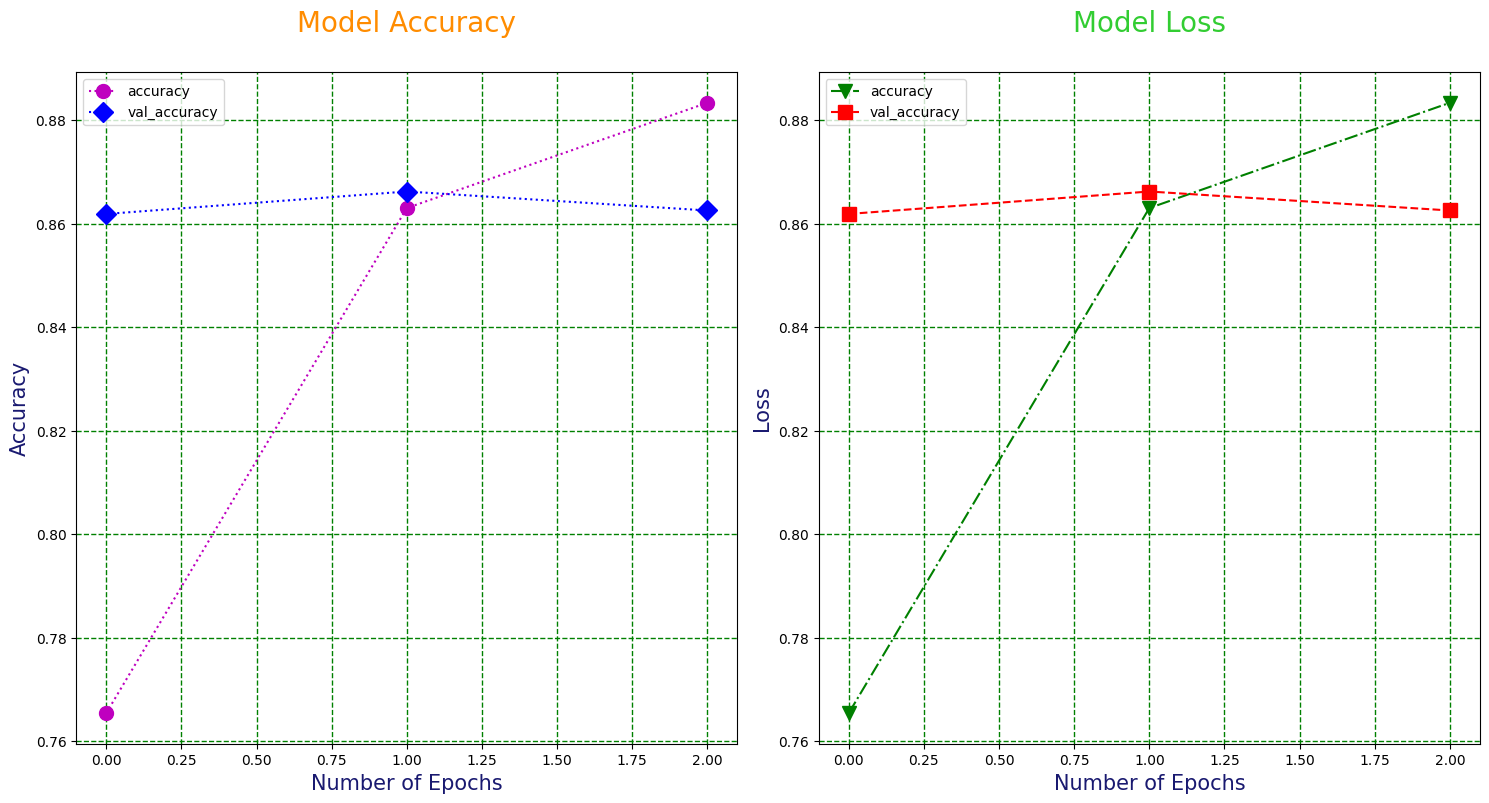

In [ ]:
def model_loss_and_accuracy(history):
    
    fig=plt.figure(figsize=(15,15))
    plt.subplot(221)
    plt.plot(history.history["accuracy"],marker="o",linestyle=":",markersize=10,color="m",label="accuracy")
    plt.plot(history.history["val_accuracy"],marker="D",linestyle=":",markersize=10,color="b",label="val_accuracy")
    plt.title("Model Accuracy\n",fontsize=20,color="darkorange")
    plt.xlabel("Number of Epochs",color="midnightblue",fontsize=15)
    plt.ylabel("Accuracy",color="midnightblue",fontsize=15)
    plt.grid(color = 'green', linestyle = '--', linewidth = 1)
    plt.legend(loc="best")
    plt.tight_layout()
    
  
    plt.subplot(222)
    plt.plot(history.history["accuracy"],marker="v",linestyle="-.",markersize=10,color="g",label="accuracy")
    plt.plot(history.history["val_accuracy"],marker="s",linestyle="--",markersize=10,color="r",label="val_accuracy")
    plt.title("Model Loss\n",fontsize=20,color="limegreen")
    plt.xlabel("Number of Epochs",color="midnightblue",fontsize=15)
    plt.ylabel("Loss",color="midnightblue",fontsize=15)
    plt.grid(color = 'green', linestyle = '--', linewidth = 1)
    plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

model_loss_and_accuracy(history)



In [ ]:
import tensorflow as tf
from sklearn.metrics import Precision, Recall, F1Score
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
param_grid = {
    'learning_rate': [1e-4, 1e-5, 1e-6],
    'batch_size': [16, 32, 64],
    'num_layers': [2, 4, 6],
    'num_units': [128, 256, 512]
}

# Create the model using a function
def create_roberta_model(num_layers, num_units):
    model = Create_Roberta_Model(num_layers=num_layers, num_units=num_units)
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
    optimizer = tf.keras.optimizers.Adam(lr=1e-5)
    precision = Precision()
    recall = Recall()
    f1score = F1Score(num_classes=num_classes, average='macro')
    model.compile(loss=loss, optimizer=optimizer, 
                  metrics=["accuracy", precision, recall, f1score])
    return model

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=create_roberta_model(),
                           param_grid=param_grid,
                           scoring='f1_macro',
                           n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print('Best parameters:', grid_search.best_params_)
print('Best F1 score:', grid_search.best_score_)